In [15]:
import pandas as pd

df1 = pd.read_csv("../data/BA_AIRlineReviews.csv")
df1.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


We take only what we need for training dataset

In [16]:
df1 = df1[['OverallRating','ReviewHeader','ReviewBody']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallRating  3696 non-null   float64
 1   ReviewHeader   3701 non-null   object 
 2   ReviewBody     3701 non-null   object 
dtypes: float64(1), object(2)
memory usage: 86.9+ KB


Since there's a few null lets investigate it.

In [17]:
df1[df1['OverallRating'].isna()]

,OverallRating,ReviewHeader,ReviewBody
3121,NaN,British Airways customer review,Cabin crew polite unfortunately BA ran out of ...
3252,NaN,British Airways customer review,Phoenix to London - outbound a wonderful and e...
3271,NaN,British Airways customer review,On past experience I chose BA for our long hau...
3509,NaN,British Airways customer review,LHR-CPH-LHR Business Class. This is a joke. Sc...
3542,NaN,British Airways customer review,I flew with British Airways with my mother fro...


Its only a few and its not that important, we will remove it for now.

In [18]:
df1 = df1[~df1['OverallRating'].isna()]
df1

,OverallRating,ReviewHeader,ReviewBody
0,1.0,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail stat...
1,3.0,"""do not upgrade members based on status""",I recently had a delay on British Airways from...
2,8.0,"""Flight was smooth and quick""","Boarded on time, but it took ages to get to th..."
3,1.0,"""Absolutely hopeless airline""","5 days before the flight, we were advised by B..."
4,1.0,"""Customer Service is non existent""","We traveled to Lisbon for our dream vacation, ..."
...,...,...,...
3696,1.0,British Airways customer review,This was a bmi Regional operated flight on a R...
3697,9.0,British Airways customer review,LHR to HAM. Purser addresses all club passenge...
3698,5.0,British Airways customer review,My son who had worked for British Airways urge...
3699,4.0,British Airways customer review,London City-New York JFK via Shannon on A318 b...


In [19]:
def rating_to_sentiment(rate):
    if rate == 5:
        return 'neutral'
    elif rate<5:
        return 'negative'
    elif rate> 5:
        return 'positive'
df1['sentiment'] = df1['OverallRating'].astype(int).apply(rating_to_sentiment)
df1['sentiment'].value_counts()

sentiment
negative    1949
positive    1513
neutral      234
Name: count, dtype: int64

The class is imbalance but not to severe. We will process the review by combining the header and body

In [20]:
df1['review'] = df1['ReviewBody'] + df1['ReviewHeader']

In [21]:
df2 = pd.read_csv("../data/IMDB Dataset.csv")
df2.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [24]:
df2['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

dataset 2 doesn't have neutral class, so we will opt it out for now

In [29]:
df = pd.concat([df1[['review','sentiment']],df2])
df = df[df.sentiment != 'neutral']
df.sentiment.value_counts()

sentiment
negative    26949
positive    26513
Name: count, dtype: int64

In [31]:
df['review']

0        4 Hours before takeoff we received a Mail stat...
1        I recently had a delay on British Airways from...
2        Boarded on time, but it took ages to get to th...
3        5 days before the flight, we were advised by B...
4        We traveled to Lisbon for our dream vacation, ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 53462, dtype: object

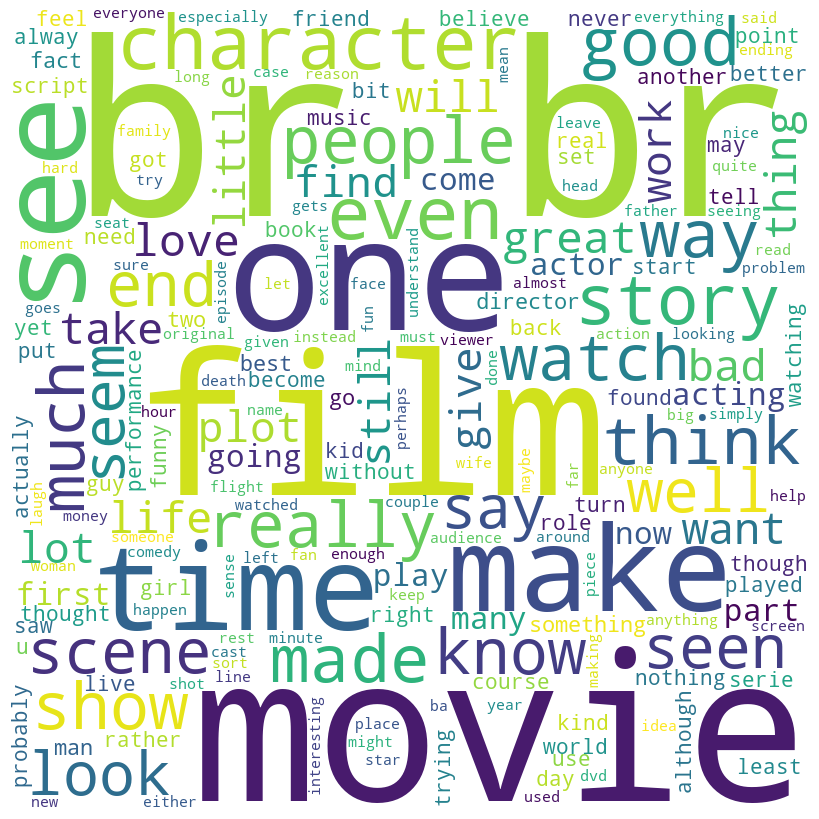

In [33]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.review:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [34]:
# df.to_csv('../data/datasets.csv')
from sklearn.model_selection import train_test_split
y=df['sentiment']
train, test = train_test_split(df, test_size=0.2, stratify=y)

# train.to_csv('../data/train.csv')
# test.to_csv('../data/test.csv')